In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [48]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [49]:
grp_hyper = df.groupby('hypertension').count()
grp_hyper

,id,gender,age,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
hypertension,,,,,,,,,,,
0,4612,4612,4612,4612,4612,4612,4612,4612,4458,4612,4612
1,498,498,498,498,498,498,498,498,451,498,498


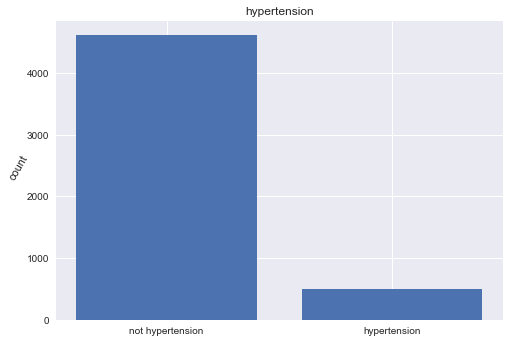

In [50]:
plt.figure()
plt.style.use('seaborn')
plt.bar(grp_hyper.index, grp_hyper.id, tick_label=grp_hyper.index)
plt.xticks(np.arange(2), ('not hypertension', 'hypertension'))
plt.ylabel('count', rotation=60)
# plt.pie(grp.id, labels=['not hypertension','hypertension'], autopct='%3.f%%',explode=[0.1,0],shadow=True)
plt.title('hypertension')
plt.show()

In [51]:
grp_heart = df.groupby('heart_disease').count()
grp_heart

,id,gender,age,hypertension,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
heart_disease,,,,,,,,,,,
0,4834,4834,4834,4834,4834,4834,4834,4834,4666,4834,4834
1,276,276,276,276,276,276,276,276,243,276,276


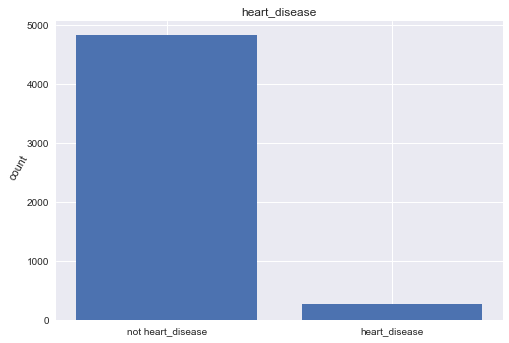

In [52]:
plt.figure()
plt.style.use('seaborn')
plt.bar(grp_heart.index, grp_heart.id, tick_label=grp_heart.index)
plt.xticks(np.arange(2), ('not heart_disease', 'heart_disease'))
plt.ylabel('count', rotation=60)
# plt.pie(grp.id, labels=['not heart_disease', 'heart_disease'], autopct='%3.f%%', explode=[0.1, 0], shadow=True)
plt.title('heart_disease')
plt.show()

In [53]:
grp_bi_hyper = df.groupby(['stroke','hypertension']).count()
grp_bi_hyper

id  gender   age  heart_disease  ever_married  \
stroke hypertension                                                    
0      0             4429    4429  4429           4429          4429   
       1              432     432   432            432           432   
1      0              183     183   183            183           183   
       1               66      66    66             66            66   

                     work_type  Residence_type  avg_glucose_level   bmi  \
stroke hypertension                                                       
0      0                  4429            4429               4429  4309   
       1                   432             432                432   391   
1      0                   183             183                183   149   
       1                    66              66                 66    60   

                     smoking_status  
stroke hypertension                  
0      0                       4429  
       1                        432  
1      0                        183  
       1                         66

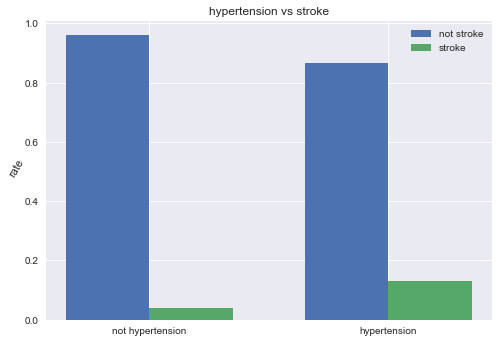

In [55]:
plt.figure()
plt.style.use('seaborn')
a = list(grp_bi_hyper.loc[(0,0):(0,1)].id)
b = list(grp_bi_hyper.loc[(1,0):(1,1)].id)
bar_width = 0.35
dist_1 = np.array([a[0], b[0]])/(a[0]+b[0])
dist_2 = np.array([a[1], b[1]]) / (a[1] + b[1])
a = [dist_1[0],dist_2[0]]
b = [dist_1[1],dist_2[1]]
index = np.arange(2)
rects1 = plt.bar(index, a, bar_width, label='not stroke')
rects2 = plt.bar(index + bar_width, b, bar_width, label='stroke')
plt.xticks([bar_width/2,bar_width/2+1], ('not hypertension', 'hypertension'))
plt.ylabel('rate', rotation=60)

plt.title('hypertension vs stroke')
plt.legend()

In [56]:
grp_bi_heart = df.groupby(['stroke','heart_disease']).count()
grp_bi_heart

id  gender   age  hypertension  ever_married  \
stroke heart_disease                                                   
0      0              4632    4632  4632          4632          4632   
       1               229     229   229           229           229   
1      0               202     202   202           202           202   
       1                47      47    47            47            47   

                      work_type  Residence_type  avg_glucose_level   bmi  \
stroke heart_disease                                                       
0      0                   4632            4632               4632  4497   
       1                    229             229                229   203   
1      0                    202             202                202   169   
       1                     47              47                 47    40   

                      smoking_status  
stroke heart_disease                  
0      0                        4632  
       1                         229  
1      0                         202  
       1                          47

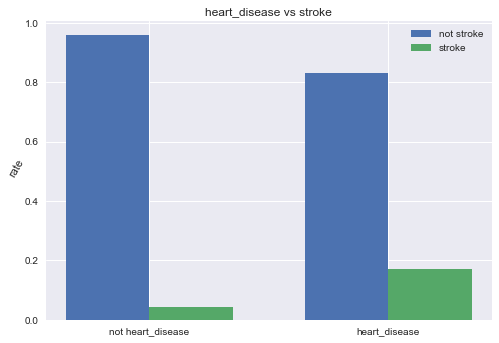

In [57]:
plt.figure()
a = list(grp_bi_heart.loc[(0,0):(0,1)].id)
b = list(grp_bi_heart.loc[(1,0):(1,1)].id)
dist_1 = np.array([a[0], b[0]]) / (a[0] + b[0])
dist_2 = np.array([a[1], b[1]]) / (a[1] + b[1])
a = [dist_1[0], dist_2[0]]
b = [dist_1[1], dist_2[1]]
index = np.arange(2)
rects1 = plt.bar(index, a, bar_width, label='not stroke')
rects2 = plt.bar(index + bar_width, b, bar_width, label='stroke')
plt.xticks([bar_width / 2, bar_width / 2 + 1], ('not heart_disease', 'heart_disease'))
plt.ylabel('rate', rotation=60)
plt.title('heart_disease vs stroke')
plt.legend()
plt.show()

In [58]:
grp_mul = df.groupby(['stroke', 'heart_disease', 'hypertension']).count()
grp_mul

id  gender   age  ever_married  \
stroke heart_disease hypertension                                     
0      0             0             4251    4251  4251          4251   
                     1              381     381   381           381   
       1             0              178     178   178           178   
                     1               51      51    51            51   
1      0             0              149     149   149           149   
                     1               53      53    53            53   
       1             0               34      34    34            34   
                     1               13      13    13            13   

                                   work_type  Residence_type  \
stroke heart_disease hypertension                              
0      0             0                  4251            4251   
                     1                   381             381   
       1             0                   178             178   
                     1                    51              51   
1      0             0                   149             149   
                     1                    53              53   
       1             0                    34              34   
                     1                    13              13   

                                   avg_glucose_level   bmi  smoking_status  
stroke heart_disease hypertension                                           
0      0             0                          4251  4153            4251  
                     1                           381   344             381  
       1             0                           178   156             178  
                     1                            51    47              51  
1      0             0                           149   120             149  
                     1                            53    49              53  
       1             0                            34    29              34  
                     1                            13    11              13

[4251, 381, 178, 51]
[149, 53, 34, 13]


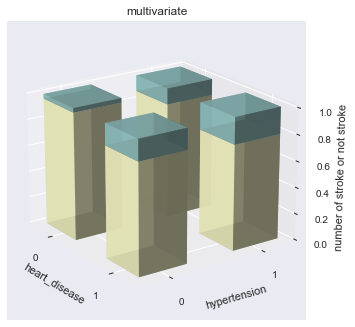

In [60]:
ax = plt.figure().add_subplot(projection='3d')
width = depth = 0.5
xs = np.array([0, 0, 1, 1]) - width / 2
ys = np.array([0, 1, 0, 1]) - width / 2
a = list(grp_mul.loc[(0, 0, 0):(0, 1, 1)].id)
b = list(grp_mul.loc[(1, 0, 0):(1, 1, 1)].id)
print(a)
print(b)
aa = []
bb = []
for i in range(len(a)):
    aa.append(a[i]/(a[i]+b[i]))
    bb.append(b[i] / (a[i] + b[i]))
ax.bar3d(xs, ys, 0, width, depth, aa,
         label='not stroke', alpha=0.8, color='#FFFFCC')
ax.bar3d(xs, ys, aa, width, depth, bb,
         label='stroke', alpha=0.8, color='#99CCCC')
# ax.legend()
ax.set_xlabel('heart_disease')
ax.set_ylabel('hypertension')
ax.set_zlabel('number of stroke or not stroke')
ax.set_yticks([0, 1])
ax.set_xticks([0, 1])
ax.view_init(elev=20., azim=-35)
ax.set_title("multivariate")
plt.show()